In [73]:
import pandas as pd
import numpy as np

In [74]:
df = pd.read_csv('./data/Churn_Modelling.csv')

In [75]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [76]:
df.shape

(10000, 14)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [78]:
df.duplicated().sum()

0

In [79]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [80]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [81]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [82]:
drop_cols = ['RowNumber','CustomerId','Surname']

df.drop(columns=drop_cols, inplace=True)

In [83]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [84]:
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [85]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [86]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [87]:
X.shape

(10000, 11)

In [88]:
X_train.shape

(8000, 11)

In [89]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


In [90]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

## ANN Model 

In [91]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [92]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [93]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [95]:
history = model.fit(X_train_scaled,y_train, epochs=100, validation_split= 0.2)

Epoch 1/100
200/200 [==============================] - 0s 744us/step - loss: 0.5192 - accuracy: 0.7908 - val_loss: 0.4848 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 457us/step - loss: 0.4687 - accuracy: 0.7972 - val_loss: 0.4615 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 0s 472us/step - loss: 0.4483 - accuracy: 0.7984 - val_loss: 0.4486 - val_accuracy: 0.7994
Epoch 4/100
200/200 [==============================] - 0s 460us/step - loss: 0.4364 - accuracy: 0.8023 - val_loss: 0.4396 - val_accuracy: 0.8025
Epoch 5/100
200/200 [==============================] - 0s 481us/step - loss: 0.4278 - accuracy: 0.8089 - val_loss: 0.4308 - val_accuracy: 0.8131
Epoch 6/100
200/200 [==============================] - 0s 479us/step - loss: 0.4191 - accuracy: 0.8164 - val_loss: 0.4211 - val_accuracy: 0.8206
Epoch 7/100
200/200 [==============================] - 0s 483us/step - loss: 0.4107 - accuracy: 0.8253 - val_loss: 0.4109 - val_ac

In [96]:
model.layers[0].get_weights()

[array([[ 8.84556696e-02, -1.96091384e-01,  3.44588101e-01,
          6.95544407e-02,  5.03928244e-01, -2.27577582e-01,
         -5.86856782e-01,  3.12179059e-01, -1.06925361e-01,
         -1.65006086e-01, -2.37189129e-01],
        [-2.76063025e-01, -1.46535158e-01, -3.25480534e-04,
          7.22874820e-01,  3.76050144e-01, -5.67886293e-01,
         -5.28109550e-01, -4.71899480e-01,  1.29286301e+00,
          2.10890127e-03,  4.72178072e-01],
        [ 1.04132533e-01, -5.10773920e-02, -9.71254587e-01,
          9.24241319e-02,  1.79150760e-01,  1.13781780e-01,
          1.33549690e-01,  3.66829336e-02,  2.54042465e-02,
          7.03048855e-02,  1.41918972e-01],
        [ 1.71225965e-01,  5.84522970e-02, -3.16244185e-01,
          3.46299410e-02, -4.71660107e-01, -4.25825417e-01,
          9.06810641e-01,  7.59859830e-02, -1.25122089e-02,
          9.92302597e-02, -7.39389777e-01],
        [-1.32654727e+00, -1.32094479e+00, -2.99173743e-01,
         -2.50979900e-01,  4.17433798e-01,  

In [97]:
model.layers[1].get_weights()

[array([[-0.36090246,  0.05684119, -0.52176225, -0.17889142, -0.51700777,
         -0.15024169, -0.0267525 , -1.6998044 ,  0.1243014 , -0.3379449 ,
          0.10647663],
        [ 0.16050503,  0.40830198, -0.6307197 , -0.8648092 , -0.6100349 ,
          0.44212404, -0.27863356, -0.52300954,  0.08223382, -0.4224405 ,
          0.654084  ],
        [ 0.37627026,  0.0196294 , -0.07445567,  0.18850084, -0.26904887,
         -0.09275717, -0.00850743,  0.06372588,  0.3892351 ,  0.5124172 ,
         -0.3172579 ],
        [-1.1420118 ,  0.940449  ,  0.02847642,  0.4037941 ,  0.5671963 ,
          1.0125043 , -0.03400729,  0.16878939, -0.00620387,  0.0171064 ,
         -0.4024229 ],
        [ 0.9316022 ,  0.1598672 ,  0.4320507 , -0.0287663 , -0.12149573,
         -0.24845427, -0.05666081,  0.11499838,  0.2640624 ,  0.32773024,
          0.02027221],
        [ 0.70005697,  0.25034457,  0.25776365, -0.39752302,  0.59811187,
         -0.28936577,  0.3575107 ,  0.4518658 ,  0.2383465 ,  0.1489776

In [98]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 305us/step


In [99]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(y_test,y_pred)

0.865

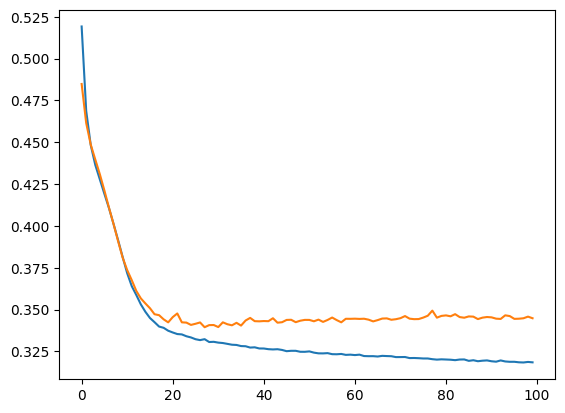

In [102]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

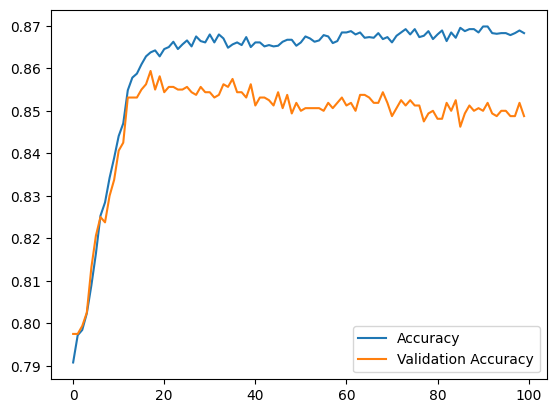

In [106]:
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')

plt.legend()
